In [41]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.axes3d import Axes3D
from numpy.linalg import multi_dot as mdot
from numpy.linalg import inv

In [42]:
def GenerateCentroids(K,X):
    centroids = np.zeros((K,X.shape[1]))
    for i in range(0,K):
        RandomDataPoint = np.random.randint(0,X.shape[0])
        centroids[i,:] = X[RandomDataPoint]
    return centroids

In [43]:
def CalculateNormDistcal(X,Mean,Covariance):
    expterm = np.exp(-0.5 * mdot([(X-Mean),inv(Covariance),np.transpose(X-Mean)]))
    DetTerm = np.sqrt(np.linalg.det(2*np.pi*Covariance))
    
    NormDist = expterm / DetTerm
    return NormDist
    

In [44]:
# calcualte the probability
def Estimation(X,Mean,K,Covariance):
    Prob = np.zeros((X.shape[0],K))
    for i in range(0,X.shape[0]):
        for k in range(K):
            Prob[i,k] = CalculateNormDistcal(X[i],Mean[k],Covariance[k])
    
    SumofProb = np.sum(Prob,axis=1)
    Prob = Prob / SumofProb[:,None]
    
    return Prob

In [45]:
def Maximiaztion(X,Mean,K,Prob,Covariance,Cluster):
    Mean = np.dot(np.transpose(Prob), X)
    Mean = Mean / np.sum(Prob,axis=0)[:,None]
    
    for k in range(K):
        SumTemp = np.zeros((2,2))
        for i in range(0,X.shape[0]):
            DotProd = np.dot(X[i].reshape(2,1),X[i].reshape(1,2))
            temp = np.array(Mean[k])
            SumTemp = SumTemp +  np.dot(Prob[i,k],DotProd) - np.dot(temp.reshape(2,1),temp.reshape(1,2))

        Covariance[k] = SumTemp / np.sum(Prob,axis=0)[k]
    
    return Mean,Covariance

In [46]:
def Maximiaztion(X,Mean,K,Prob,Covariance,Cluster):
    Mean = np.dot(np.transpose(Prob), X)
    Mean = Mean / np.sum(Prob,axis=0)[:,None]
    S_covMatrices = np.zeros((3, 2, 2))
    
    for k in range(K):
        for i in range(0,X.shape[0]):
            ys = np.reshape(X[i] - Mean[k], (2, 1))
            S_covMatrices[k] += Prob[i, k] * np.dot(ys, ys.T)
        Covariance[k] = S_covMatrices[k] / np.sum(Prob,axis=0)[k]
    
    return Mean,Covariance

In [47]:
X = np.loadtxt("mixture.txt")
print("data.shape:", X.shape)

data.shape: (300, 2)


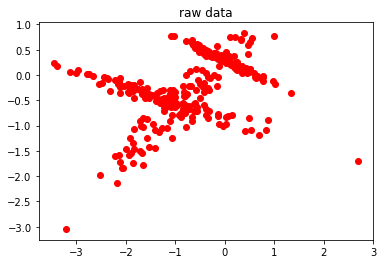

In [48]:
fig = plt.figure()
ax = fig.add_subplot(111) # the projection arg is important!
ax.scatter(X[:, 0], X[:, 1], color="red")
ax.set_title("raw data")
plt.draw()

In [49]:
# Number of Clusters
K = 3
Cluster = np.zeros(X.shape[0])
Mean = GenerateCentroids(K,X)
Offset = 1e-16
Covariance = np.zeros((3,2,2))
oldprob = np.zeros((X.shape[0],K))
for i in range(K):
    Covariance[i] = np.cov(np.transpose(X))
    #Covariance[i] = np.eye(2,2)

for itere in range(30):
    Prob = Estimation(X,Mean,K,Covariance)
    if abs(np.sum((Prob - oldprob))) < Offset :
        break
    oldprob = Prob
    
    Mean,Covariance = Maximiaztion(X,Mean,K,Prob,Covariance,Cluster)
print("Iterations : ", itere)

Iterations :  4


In [50]:
print(Mean)

[[-0.79951604 -0.43953597]
 [-0.27625402 -0.30544947]
 [-1.06519442 -0.02942969]]


In [51]:
print(Covariance)

[[[0.61383908 0.53218463]
  [0.53218463 0.57093931]]

 [[0.69819507 0.08582736]
  [0.08582736 0.33268875]]

 [[1.1770166  0.13898149]
  [0.13898149 0.12710334]]]


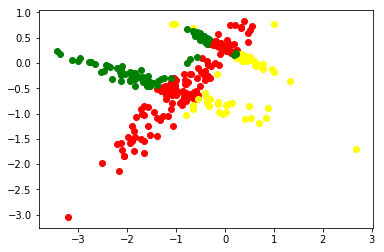

In [52]:
Cluster = np.argmax(Prob,axis=1)
import pandas as pd
d = pd.DataFrame(X)
d0 = d[Cluster== 0] 
d1 = d[Cluster== 1] 
d2 = d[Cluster== 2] 

plt.scatter(d0[0], d0[1], c ='r') 
plt.scatter(d1[0], d1[1], c ='yellow') 
plt.scatter(d2[0], d2[1], c ='g') 

In [53]:
# Number of Clusters
K = 3
Cluster = np.zeros(X.shape[0])
Mean = GenerateCentroids(K,X)
Prob = np.zeros((X.shape[0],K))
Covariance = np.zeros((3,2,2))

for i in range(K):
    Covariance[i] = np.cov(np.transpose(X))
    #Covariance[i] = np.eye(2,2)

for i in range(X.shape[0]):
    randomcluster =  np.random.randint(0,K)
    if randomcluster == 0:
        Prob[i] = [1,0,0]
    elif randomcluster ==1:
        Prob[i] = [0,1,0]
    else:
        Prob[i] = [0,0,1]

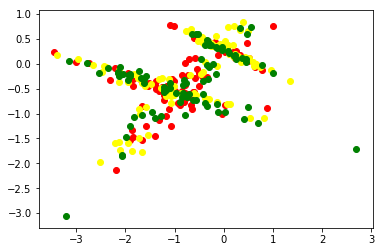

In [54]:
Cluster = np.argmax(Prob,axis=1)
import pandas as pd
d = pd.DataFrame(X)
d0 = d[Cluster== 0] 
d1 = d[Cluster== 1] 
d2 = d[Cluster== 2] 

plt.scatter(d0[0], d0[1], c ='r') 
plt.scatter(d1[0], d1[1], c ='yellow') 
plt.scatter(d2[0], d2[1], c ='g') 

In [55]:

Offset = 1e-16
oldprob = np.zeros((X.shape[0],K))


for itere in range(50):
    Mean,Covariance = Maximiaztion(X,Mean,K,Prob,Covariance,Cluster)
    Prob = Estimation(X,Mean,K,Covariance)
    if abs(np.sum((Prob - oldprob))) < Offset :
        break
    oldprob = Prob
print("Iterations : ", itere)

Iterations :  14


In [56]:
print(Mean)

[[ 0.0511488   0.26751202]
 [-0.95356796 -0.60452872]
 [-1.25702639 -0.46873121]]


In [57]:
print(Covariance)

[[[ 0.20082934 -0.08906845]
  [-0.08906845  0.04688475]]

 [[ 0.60020232  0.55439382]
  [ 0.55439382  0.58200343]]

 [[ 1.00529947 -0.31045581]
  [-0.31045581  0.10410495]]]


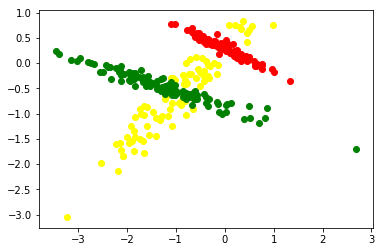

In [58]:
Cluster = np.argmax(Prob,axis=1)
import pandas as pd
d = pd.DataFrame(X)
d0 = d[Cluster== 0] 
d1 = d[Cluster== 1] 
d2 = d[Cluster== 2] 

plt.scatter(d0[0], d0[1], c ='r') 
plt.scatter(d1[0], d1[1], c ='yellow') 
plt.scatter(d2[0], d2[1], c ='g') 

In [59]:
import pandas as pd
def plot(Prob):
    Cluster = np.argmax(Prob,axis=1)
    d = pd.DataFrame(X)
    d0 = d[Cluster== 0] 
    d1 = d[Cluster== 1] 
    d2 = d[Cluster== 2] 

    plt.scatter(d0[0], d0[1], c ='r') 
    plt.scatter(d1[0], d1[1], c ='yellow') 
    plt.scatter(d2[0], d2[1], c ='g') 

Iterations :  [[-0.66519562  0.00700877]
 [-0.82834354 -0.94972973]
 [-0.8499862  -0.74562179]]


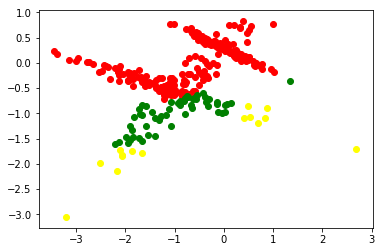

In [60]:
# Number of Clusters
K = 3
Cluster = np.zeros(X.shape[0])
Mean = GenerateCentroids(K,X)
Offset = 1e-16
Covariance = np.zeros((3,2,2))
oldprob = np.zeros((X.shape[0],K))
for i in range(K):
    Covariance[i] = np.cov(np.transpose(X))
    #Covariance[i] = np.eye(2,2)

for itere in range(1):
    Prob = Estimation(X,Mean,K,Covariance)
    Mean,Covariance = Maximiaztion(X,Mean,K,Prob,Covariance,Cluster)
    plot(Prob)
print("Iterations : ", Mean)

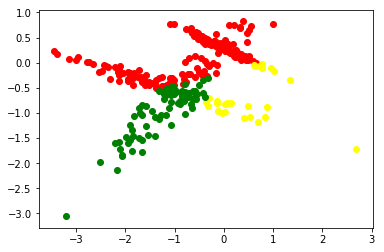

In [61]:
# Number of Clusters
K = 3
Cluster = np.zeros(X.shape[0])
Mean = GenerateCentroids(K,X)
Offset = 1e-16
Covariance = np.zeros((3,2,2))
oldprob = np.zeros((X.shape[0],K))
for i in range(K):
    Covariance[i] = np.cov(np.transpose(X))
    #Covariance[i] = np.eye(2,2)

for itere in range(2):
    Prob = Estimation(X,Mean,K,Covariance)
    Mean,Covariance = Maximiaztion(X,Mean,K,Prob,Covariance,Cluster)
plot(Prob)

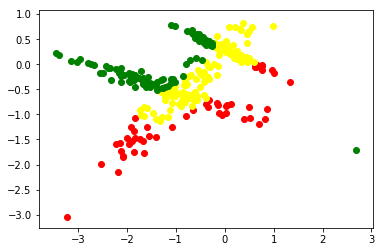

In [62]:
# Number of Clusters
K = 3
Cluster = np.zeros(X.shape[0])
Mean = GenerateCentroids(K,X)
Offset = 1e-16
Covariance = np.zeros((3,2,2))
oldprob = np.zeros((X.shape[0],K))
for i in range(K):
    Covariance[i] = np.cov(np.transpose(X))
    #Covariance[i] = np.eye(2,2)

for itere in range(3):
    Prob = Estimation(X,Mean,K,Covariance)
    Mean,Covariance = Maximiaztion(X,Mean,K,Prob,Covariance,Cluster)
plot(Prob)

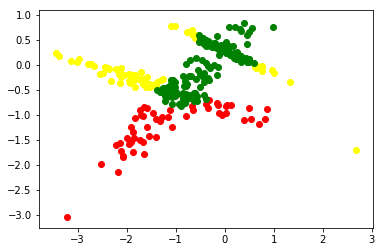

In [63]:
# Number of Clusters
K = 3
Cluster = np.zeros(X.shape[0])
Mean = GenerateCentroids(K,X)
Offset = 1e-16
Covariance = np.zeros((3,2,2))
oldprob = np.zeros((X.shape[0],K))
for i in range(K):
    Covariance[i] = np.cov(np.transpose(X))
    #Covariance[i] = np.eye(2,2)

for itere in range(4):
    Prob = Estimation(X,Mean,K,Covariance)
    Mean,Covariance = Maximiaztion(X,Mean,K,Prob,Covariance,Cluster)
plot(Prob)

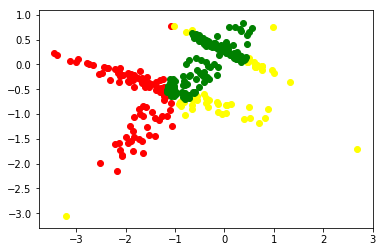

In [64]:
# Number of Clusters
K = 3
Cluster = np.zeros(X.shape[0])
Mean = GenerateCentroids(K,X)
Offset = 1e-16
Covariance = np.zeros((3,2,2))
oldprob = np.zeros((X.shape[0],K))
for i in range(K):
    Covariance[i] = np.cov(np.transpose(X))
    #Covariance[i] = np.eye(2,2)

for itere in range(4):
    Prob = Estimation(X,Mean,K,Covariance)
    Mean,Covariance = Maximiaztion(X,Mean,K,Prob,Covariance,Cluster)
plot(Prob)

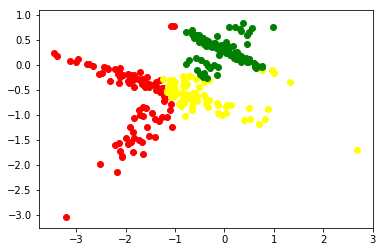

In [65]:
# Number of Clusters
K = 3
Cluster = np.zeros(X.shape[0])
Mean = GenerateCentroids(K,X)
Offset = 1e-16
Covariance = np.zeros((3,2,2))
oldprob = np.zeros((X.shape[0],K))
for i in range(K):
    Covariance[i] = np.cov(np.transpose(X))
    #Covariance[i] = np.eye(2,2)

for itere in range(5):
    Prob = Estimation(X,Mean,K,Covariance)
    Mean,Covariance = Maximiaztion(X,Mean,K,Prob,Covariance,Cluster)
plot(Prob)

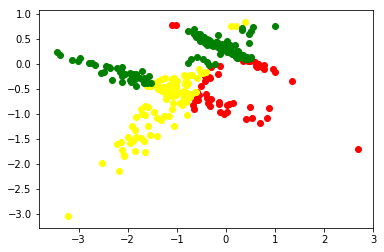

In [66]:
# Number of Clusters
K = 3
Cluster = np.zeros(X.shape[0])
Mean = GenerateCentroids(K,X)
Offset = 1e-16
Covariance = np.zeros((3,2,2))
oldprob = np.zeros((X.shape[0],K))
for i in range(K):
    Covariance[i] = np.cov(np.transpose(X))
    #Covariance[i] = np.eye(2,2)

for itere in range(6):
    Prob = Estimation(X,Mean,K,Covariance)
    Mean,Covariance = Maximiaztion(X,Mean,K,Prob,Covariance,Cluster)
plot(Prob)

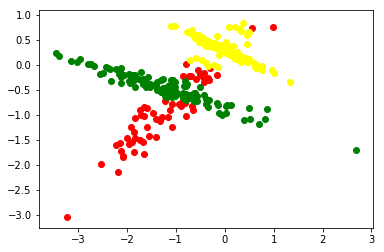

In [67]:
# Number of Clusters
K = 3
Cluster = np.zeros(X.shape[0])
Mean = GenerateCentroids(K,X)
Offset = 1e-16
Covariance = np.zeros((3,2,2))
oldprob = np.zeros((X.shape[0],K))
for i in range(K):
    Covariance[i] = np.cov(np.transpose(X))
    #Covariance[i] = np.eye(2,2)

for itere in range(7):
    Prob = Estimation(X,Mean,K,Covariance)
    Mean,Covariance = Maximiaztion(X,Mean,K,Prob,Covariance,Cluster)
plot(Prob)

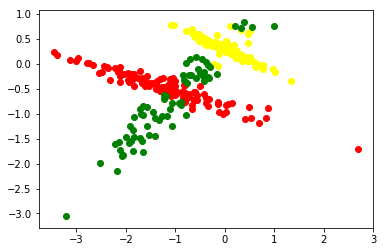

In [68]:
# Number of Clusters
K = 3
Cluster = np.zeros(X.shape[0])
Mean = GenerateCentroids(K,X)
Offset = 1e-16
Covariance = np.zeros((3,2,2))
oldprob = np.zeros((X.shape[0],K))
for i in range(K):
    Covariance[i] = np.cov(np.transpose(X))
    #Covariance[i] = np.eye(2,2)

for itere in range(8):
    Prob = Estimation(X,Mean,K,Covariance)
    Mean,Covariance = Maximiaztion(X,Mean,K,Prob,Covariance,Cluster)
plot(Prob)

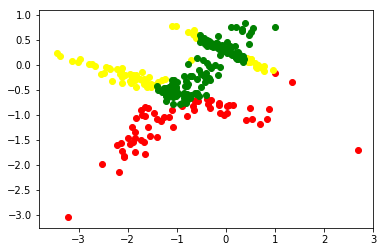

In [69]:
# Number of Clusters
K = 3
Cluster = np.zeros(X.shape[0])
Mean = GenerateCentroids(K,X)
Offset = 1e-16
Covariance = np.zeros((3,2,2))
oldprob = np.zeros((X.shape[0],K))
for i in range(K):
    Covariance[i] = np.cov(np.transpose(X))
    #Covariance[i] = np.eye(2,2)

for itere in range(9):
    Prob = Estimation(X,Mean,K,Covariance)
    Mean,Covariance = Maximiaztion(X,Mean,K,Prob,Covariance,Cluster)
plot(Prob)

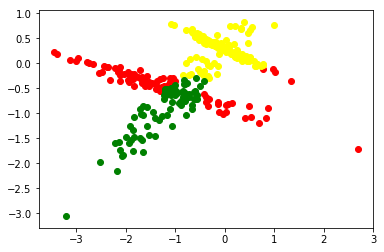

In [70]:
# Number of Clusters
K = 3
Cluster = np.zeros(X.shape[0])
Mean = GenerateCentroids(K,X)
Offset = 1e-16
Covariance = np.zeros((3,2,2))
oldprob = np.zeros((X.shape[0],K))
for i in range(K):
    Covariance[i] = np.cov(np.transpose(X))
    #Covariance[i] = np.eye(2,2)

for itere in range(10):
    Prob = Estimation(X,Mean,K,Covariance)
    Mean,Covariance = Maximiaztion(X,Mean,K,Prob,Covariance,Cluster)
plot(Prob)

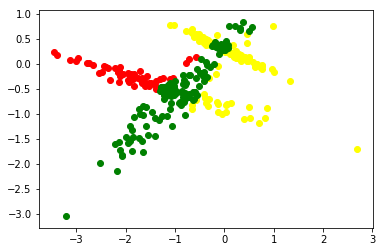

In [71]:
# Number of Clusters
K = 3
Cluster = np.zeros(X.shape[0])
Mean = GenerateCentroids(K,X)
Offset = 1e-16
Covariance = np.zeros((3,2,2))
oldprob = np.zeros((X.shape[0],K))
for i in range(K):
    Covariance[i] = np.cov(np.transpose(X))
    #Covariance[i] = np.eye(2,2)

for itere in range(11):
    Prob = Estimation(X,Mean,K,Covariance)
    Mean,Covariance = Maximiaztion(X,Mean,K,Prob,Covariance,Cluster)
plot(Prob)

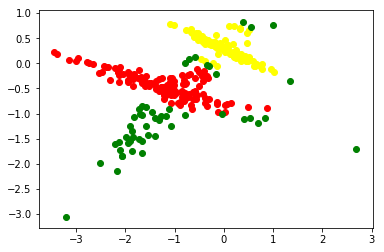

In [72]:
# Number of Clusters
K = 3
Cluster = np.zeros(X.shape[0])
Mean = GenerateCentroids(K,X)
Offset = 1e-16
Covariance = np.zeros((3,2,2))
oldprob = np.zeros((X.shape[0],K))
for i in range(K):
    Covariance[i] = np.cov(np.transpose(X))
    #Covariance[i] = np.eye(2,2)

for itere in range(12):
    Prob = Estimation(X,Mean,K,Covariance)
    Mean,Covariance = Maximiaztion(X,Mean,K,Prob,Covariance,Cluster)
plot(Prob)

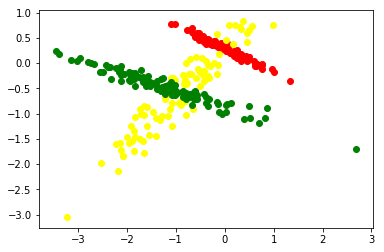

In [73]:
# Number of Clusters
K = 3
Cluster = np.zeros(X.shape[0])
Mean = GenerateCentroids(K,X)
Offset = 1e-16
Covariance = np.zeros((3,2,2))
oldprob = np.zeros((X.shape[0],K))
for i in range(K):
    Covariance[i] = np.cov(np.transpose(X))
    #Covariance[i] = np.eye(2,2)

for itere in range(13):
    Prob = Estimation(X,Mean,K,Covariance)
    Mean,Covariance = Maximiaztion(X,Mean,K,Prob,Covariance,Cluster)
plot(Prob)

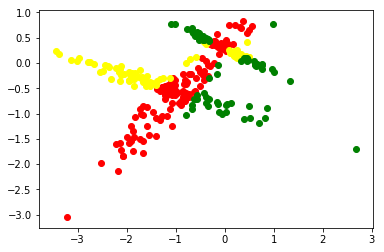

In [74]:
# Number of Clusters
K = 3
Cluster = np.zeros(X.shape[0])
Mean = GenerateCentroids(K,X)
Offset = 1e-16
Covariance = np.zeros((3,2,2))
oldprob = np.zeros((X.shape[0],K))
for i in range(K):
    Covariance[i] = np.cov(np.transpose(X))
    #Covariance[i] = np.eye(2,2)

for itere in range(14):
    Prob = Estimation(X,Mean,K,Covariance)
    Mean,Covariance = Maximiaztion(X,Mean,K,Prob,Covariance,Cluster)
plot(Prob)

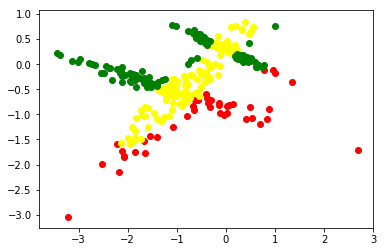

In [75]:
# Number of Clusters
K = 3
Cluster = np.zeros(X.shape[0])
Mean = GenerateCentroids(K,X)
Offset = 1e-16
Covariance = np.zeros((3,2,2))
oldprob = np.zeros((X.shape[0],K))
for i in range(K):
    Covariance[i] = np.cov(np.transpose(X))
    #Covariance[i] = np.eye(2,2)

for itere in range(15):
    Prob = Estimation(X,Mean,K,Covariance)
    Mean,Covariance = Maximiaztion(X,Mean,K,Prob,Covariance,Cluster)
plot(Prob)

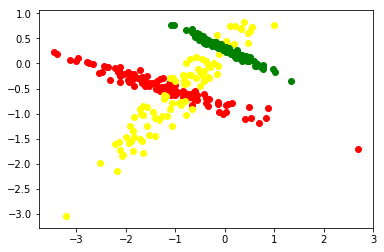

In [76]:
# Number of Clusters
K = 3
Cluster = np.zeros(X.shape[0])
Mean = GenerateCentroids(K,X)
Offset = 1e-16
Covariance = np.zeros((3,2,2))
oldprob = np.zeros((X.shape[0],K))
for i in range(K):
    Covariance[i] = np.cov(np.transpose(X))
    #Covariance[i] = np.eye(2,2)

for itere in range(16):
    Prob = Estimation(X,Mean,K,Covariance)
    Mean,Covariance = Maximiaztion(X,Mean,K,Prob,Covariance,Cluster)
plot(Prob)